In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import urllib

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

#will make your plot outputs appear and be stored within the notebook.
%matplotlib inline 

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Create Custom Dataset 

In [26]:
# create packages of apps 
app_packages = [
    'com.zhiliaoapp.musically',
    'com.instagram.android',
    'com.facebook.orca',
    'com.whatsapp',
    'org.telegram.messenger',
    'com.facebook.katana',
    'com.facebook.lite',
    'com.snapchat.android',
    'com.aigc.ushow.ichat',
    'com.reddit.frontpage'
]
print(f"Number of apps = {len(app_packages)}")

Number of apps = 10


In [27]:
# iterate over each package
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.21it/s]


In [28]:
def print_json(json_obj):
    '''
        function will convert a subset of Python objects into a json string.
        Not all objects are convertible 
        and you may need to create a dictionary of data
        you wish to expose before serializing to JSON.
    '''
    json_str = json.dumps(
        json_obj,
        indent=2,
        sort_keys=True, #the output of dictionaries will be sorted by key
        default=str  # return all in string
    )
    
    print(highlight(json_str, JsonLexer(), TerminalFormatter())) # highlight the text

In [29]:
print_json(app_infos[0])

{
  "adSupported": true,
  "appId": "com.zhiliaoapp.musically",
  "categories": [
    {
      "id": "SOCIAL",
      "name": "Social"
    }
  ],
  "containsAds": true,
  "contentRating": "Teen",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "TikTok is THE destination for mobile videos. On TikTok, short-form videos are exciting, spontaneous, and genuine. Whether you\u2019re a sports fanatic, a pet enthusiast, or just looking for a laugh, there\u2019s something for everyone on TikTok. All you have to do is watch, engage with what you like, skip what you don\u2019t, and you\u2019ll find an endless stream of short videos that feel personalized just for you. From your morning coffee to your afternoon errands, TikTok has the videos that are guaranteed to make your day.\r\n\r\nWe make it easy for you to discover and create your own original videos by providing easy-to-use tools to view and capture your daily moments. Take your videos to the next level with special e

In [32]:
# visualize icons of the apps
def plot_icons(app_infos):
    fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14,3))
    fig.tight_layout()
    
    for i, ax in enumerate(axs.flat):
        apps = app_infos[i]
        img = np.array(Image.open(urllib.request.urlopen(apps['icon'])))
        ax.imshow(img)
        ax.set_title(apps['title'])
        ax.axis('off')

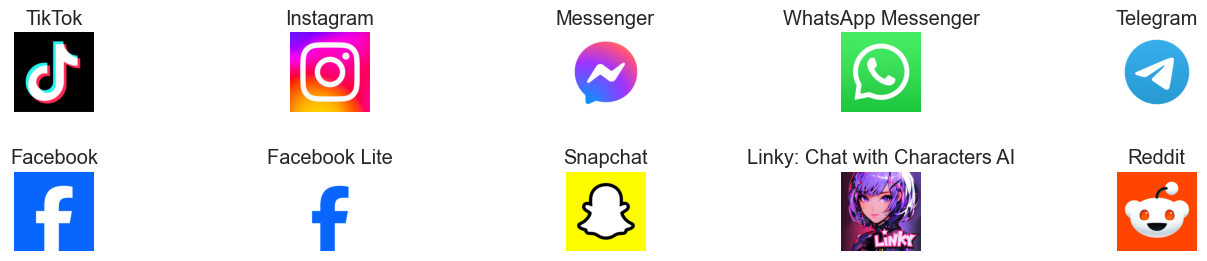

In [33]:
plot_icons(app_infos)

In [34]:
# turn data into dataframe
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(3)

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,appId,url
0,TikTok,TikTok is THE destination for mobile videos. O...,TikTok is THE destination for mobile videos. O...,Join your friends and discover videos you love...,"1,000,000,000+",1000000000,3079207043,4.238541,62516921,2185222,...,Teen,None,True,True,"Jul 9, 2015","Apr 25, 2024",1714056141,None,com.zhiliaoapp.musically,https://play.google.com/store/apps/details?id=...
1,Instagram,Little moments lead to big friendships. Share ...,Little moments lead to big friendships. Share ...,"Create & share photos, stories, & reels with f...","5,000,000,000+",5000000000,5497942600,4.035190,152859911,4500205,...,Teen,None,True,True,"Apr 3, 2012","Apr 23, 2024",1713882324,None,com.instagram.android,https://play.google.com/store/apps/details?id=...
2,Messenger,"Be together whenever, with our free* all-in-on...","Be together whenever, with our free* all-in-on...","Free group video chat, video calls, voice call...","5,000,000,000+",5000000000,6472690505,4.084818,88865344,2404460,...,Everyone,None,False,False,"Jan 30, 2014","Apr 23, 2024",1713878927,None,com.facebook.orca,https://play.google.com/store/apps/details?id=...


In [35]:
# save it as csv file
app_infos_df.to_csv('apps.csv',index=None,header=True)

# Get App Reviews

In [39]:
# take the most relevant and newest reviews
'''
    Score
    1 --> 2 'NEGATIVE'
    3       'NEUTRAL'
    4 --> 5 'POSITIVE'
'''
app_reviews = []

for ap in tqdm(app_packages):
    for score in range(1,6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs = reviews(
                ap,
                lang='en',
                country='us',
                sort=sort_order,
                count=200 if score==3 else 100, # to overcome imbalance data problems
                filter_score_with=score
            )[0]
            
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:26<00:00,  8.66s/it]


In [40]:
print_json(app_reviews[0])

{
  "appId": "com.zhiliaoapp.musically",
  "appVersion": "34.1.5",
  "at": "2024-04-02 02:24:32",
  "content": "Was great until a month or so ago. Videos have constantly freezing, lagging, and just not playing at all. I have tried everything. I forced stopped tiktok and cleared the app cache and the app data. I uninstalled and reinstalled the app. I restarted my phone and cleared out about 20 GB of the general storage. I checked my Internet connection. Absolutely nothing worked. I put in a support ticket but received nothing back within the supposed \"1-4 business days\" that it takes to get a response.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "34.1.5",
  "reviewId": "190fb97c-b5a0-451f-94d0-a08529ec9746",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 4911,
  "userImage": "https://play-lh.googleusercontent.com/a/ACg8ocI9FhqRG2s9pVVeDQlgKE2FWI8MjbsM75K8gTwr_MekBC30kw=mo",
  "userName": "Mirage Abramowicz"
}



In [42]:
app_reviews_df = pd.DataFrame(app_reviews)
print(f"Number of reviews = {app_reviews_df.shape[0]}")

Number of reviews = 11991


In [43]:
app_reviews_df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,190fb97c-b5a0-451f-94d0-a08529ec9746,Mirage Abramowicz,https://play-lh.googleusercontent.com/a/ACg8oc...,Was great until a month or so ago. Videos have...,1,4911,34.1.5,2024-04-02 02:24:32,None,NaT,34.1.5,most_relevant,com.zhiliaoapp.musically
1,6a13f634-bf33-456b-9410-ed944c1dc4fc,Rashelley Morgan,https://play-lh.googleusercontent.com/a-/ALV-U...,I'm tired of tiktok messing up my edits. Eithe...,1,572,34.1.5,2024-04-08 18:02:30,None,NaT,34.1.5,most_relevant,com.zhiliaoapp.musically
2,3abea28d-c039-4762-a26d-4168e22c3951,Robert Barlow,https://play-lh.googleusercontent.com/a-/ALV-U...,This is getting less and less optimized for my...,1,18292,33.2.5,2024-02-01 15:48:31,None,NaT,33.2.5,most_relevant,com.zhiliaoapp.musically


In [44]:
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [1]:
def to_sentiment(rating):
    '''
    classify sentiment into 3 categories
    '''
    rating = int(rating)
    if rating <= 2:
        return 0 # negative review
    elif rating == 3:
        return 1 # neutral review
    else:
        return 2 # positive review

In [7]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df['sentiment'] = reviews_df.score.apply(to_sentiment)
class_names = ['negative', 'neutral', 'positive']
columns = ['content', 'sentiment']
data = pd.DataFrame(reviews_df, columns=columns)
data.to_csv('data.csv', index=None, header=True)
data = pd.read_csv('data.csv')

In [9]:
data = data.sample(frac = 1)
data.head(10)

,content,sentiment
10012,It's a decent app in terms of roleplaying with...,1
2680,"Dear Meta, The end-to-end encrypted is INCONVE...",0
9016,It's so wow,1
3696,"Everything is going well, except for sharing i...",0
1522,My account has been hacked and my new account ...,0
5821,An excellent app with a very small issue that ...,2
4632,I see! You want me to rate the WhatsApp app fo...,2
11747,It is quite beneficial and informative.,2
1436,It's nice to use for chat and to post from my ...,0
1170,Grateful 🥰 app,2
